# Toma de contacto con scikit-learn
Para arrancar con la parte más práctica del curso, vamos a familiarizarnos con los jupyter noteboks y verificar que todo el entorno funciona correctamente. Para ello, empezaremos a jugar con un problema sencillo con el famoso dataset de las flores iris.

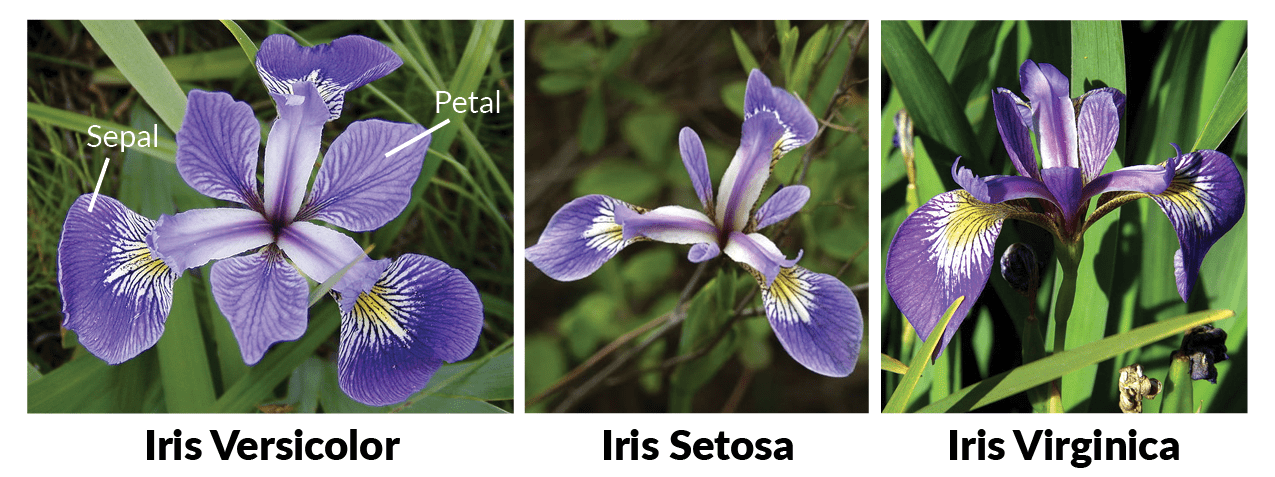

+ 50 ejemplos de 3 tipos diferentes de flores (¿qué tipo de problema es este?)
+ atributos, features, variables, predictores, variables dependientes...: longitud y ancho del sépalo y lóngitud y ancho del pétalo

es posiblemente uno de los toy-datasets más usados y conocidos en clasificación a la hora de utilizar técnicas de ML. Nos va a servir para ilustrar los primeros pasos básicos a la hora de lanzar cualquier análisis, y más en concreto usando scikit-learn.

el primer paso siempre es la carga de las librerías que se van a usar: 

In [ ]:
# Importamos las librerías que vamos a usar lo primero
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline 
#necesario solamente para jupyter notebook
#indicamos a matplotlib el backend que queremos que use

una vez se han cargado todas las librerías, se procede a la carga de datos. En nuestro caso, al tratarse de un dataset tan conocido, scikit-learn lo incluye por defecto en los datasets que incorpora, por lo que lo cargaremos haciendo uso de las librerías. En un entorno de análisis real, cargaríamos los datos desde un fichero csv, excel, SPSS, matlab, imágenes.... para ir entrando en calor cargamos desde los ejemplos de la propia librería, pero recordad que hemos cogido el camino "pro".

por defecto los datasets que vienen cargados en scikit-learn no están hechos con *Pandas* y son conocidos como bunch. Los *data.frame* vienen con muchas opciones por defecto que hacen que merezca la pena tomarse la molestia de convertirlos para aprovechar al máximo la potencia de la librería. Como además esto es algo que puede que tengamos que hacer muchas veces, vamos a definir una función en python que me convierta de manera genérica cualquier dataset de scikit-learn en un *data.frame* de pandas

In [ ]:
from sklearn import datasets

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(datasets.load_iris())

df_iris.head()

vamos a echar un vistazo a todo lo que nos ofrece la librería pandas

In [ ]:
tmp = datasets.load_iris()

#Esta librería es solo para mejorar la lectura de los resultados
from rich import print

print(tmp.DESCR)

In [ ]:
df_iris.idxmax()

algunas de las opciones más utilizadas para obtener información son:
+ df_iris.shape
+ df_iris.index
+ df_iris.columns
+ df_iris.info()
+ df_iris.count()
+ df_iris.sum()
+ df_iris.cumsum()
+ df_iris.min() o df_iris.max()
+ df_iris.idxmin() o df_iris.idxmax()
+ df_iris.describe()
+ df_iris.mean()
....

También se podría definir y aplicar una función a todo el *data.frame*

In [ ]:
function = lambda x: x*2
df_iris.apply(function)

se podría consultar los valores únicos de una columna por ejemplo:

In [ ]:
df_iris.target.unique()

una de las mejores cosas de R y de Python (lo imita de R) es que a los paquetes, se les suele añadir una *cheat sheet*, que es un resumen gráfico de las opciones más comunes que se suelen utilizar. Por ejemplo, para *pandas* la tenemos disponible [aquí](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

antes de plantearnos siquiera realizar cualquier análisis, un data scientist debe preguntarse lo siguiente, ¿conozco mis datos? a pesar de que los análisis comparten fases y se pueden elaborar pipelines de análisis que se mantienen en el tiempo, no sirve ABSOLUTAMENTE de nada analizar unos datos y no saber interpretar los resultados. También es conveniente conocer de manera, lo más exhaustiva posible

In [ ]:
df_iris.shape

In [ ]:
df_iris.info()

In [ ]:
df_iris.describe()

In [ ]:
df_iris.target.value_counts()

In [ ]:
df_iris["target"].value_counts()

In [ ]:
df_iris.boxplot(by="target",figsize=(10,10))

In [ ]:
df_iris.plot(kind='box')

In [ ]:
df_iris.hist(edgecolor='black')

In [ ]:
df_iris.hist(bins=100,figsize=(10,10))
#plt.show() # en jupyter es opcional, no hace falta. Muestra plots por defecto

In [ ]:
df_iris_toplot=df_iris.drop('target',axis=1)
df_iris_toplot.hist(edgecolor='red')

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_iris_toplot,figsize=(10,10))
plt.show()

In [ ]:
sns.pairplot(data=df_iris_toplot)

In [ ]:
sns.pairplot(df_iris, hue="target")

In [ ]:
#problema
#sns.pairplot(dataset, hue="target")
#ver ayuda de la función

df_iris.loc[df_iris.target==0,'target_cat']='setosa'
df_iris.loc[df_iris.target==1,'target_cat']='versicolor'
df_iris.loc[df_iris.target==2,'target_cat']='virginica'
print(df_iris)

nombre_columnas=list(df_iris.columns)

In [ ]:
sns.pairplot(df_iris.iloc[:,[0,1,2,3,5]],hue='target_cat',diag_kind="hist")

# Conclusiones finales
+ Hemos hecho una descripción de los datos utilizando diferentes aproximaciones. Ojo, no están todas las que son ni son todas las que están ;)
+ Es uno de los datasets mas famosos en clasificación
+ Es muy fácil, veremos a qué nos referimos en el siguiente notebook

## API de scikit-learn
Es un API muy bien diseñada y simple. Está orientado a objetos y todos comparten un interfaz consistente y simple. Esta afirmación hay que entenderla en contexto ;)

Los principios de diseño que han seguido son los [siguientes](https://arxiv.org/pdf/1309.0238v1.pdf)

+ *Estimators*: cualquier objeto que pueda estimar algún parámetro basado en un dataset. La estimación se hace mediante el método *fit* y sólo necesita un dataset como entrada (en caso de entrenamiento supervisado el estimador necesitaría dos, los datos y las salidas). Cualquier otro parámetro necesario para guiar la estimación, es considerado un hiperparámetro.
+ *Transformers*: algunos *estimators* pueden transformar un dataset. El API de nuevo es simple, tiene un método *transform()* y el método acepta como parámetro el dataset. Devuelve el dataset transformado. Todos tienen un *fit_transform* que realiza las dos operaciones pero de forma optimizada.
+ *Predictors*: algunos *estimators* pueden hacer predicciones también si se aplican sobre un dataset. Tiene un método *predict()* que recibe un dataset y devuelve las predicciones en el mismo formato. Tiene también un método *score()* que devuelve un valor que indica lo bien que se ha hecho la predicción (y las etiquetas en caso de ser un problema de clasificación).
+ *Inspection*: todos los hiperparámetros de un *estimator* son accesibles directamente mediante variables públicas (*imputer.strategy*) y los parámetros que haya aprendido son accesibles de la misma manera pero con símbolo de subrayad0 (*imputer.strategy_*)
+ Composición de los elementos anteriores. Es fácil realizar acción que incluyen varias acciones por composición de acciones sencillas.
+ Valores por defecto para la mayoría de hiperparámetros. Esto es bueno porque se puede usar cualquier cosa rápido y malo, porque muchas veces no se sabe lo que se está haciendo.